1. Describe the data. What does it represent? What types are present? What does each data points' distribution look like? Discuss these questions, and your own, with your partners. Document your conclusions.
2. What kind of cleaning is needed? Document any potential issues that will need to be resolved

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

In [26]:
# Read in data

spray = pd.read_csv('../assets/spray.csv')
test = pd.read_csv('../assets/test.csv')
train = pd.read_csv('../assets/train.csv')
weather = pd.read_csv('../assets/weather.csv')

In [19]:
train.head()

,Date,Address,Species,Block,Street,Trap,AddressNumberAndStreet,Latitude,Longitude,AddressAccuracy,NumMosquitos,WnvPresent
0,2007-05-29,"4100 North Oak Park Avenue, Chicago, IL 60634,...",CULEX PIPIENS/RESTUANS,41,N OAK PARK AVE,T002,"4100 N OAK PARK AVE, Chicago, IL",41.954690,-87.800991,9,1,0
1,2007-05-29,"4100 North Oak Park Avenue, Chicago, IL 60634,...",CULEX RESTUANS,41,N OAK PARK AVE,T002,"4100 N OAK PARK AVE, Chicago, IL",41.954690,-87.800991,9,1,0
2,2007-05-29,"6200 North Mandell Avenue, Chicago, IL 60646, USA",CULEX RESTUANS,62,N MANDELL AVE,T007,"6200 N MANDELL AVE, Chicago, IL",41.994991,-87.769279,9,1,0
3,2007-05-29,"7900 West Foster Avenue, Chicago, IL 60656, USA",CULEX PIPIENS/RESTUANS,79,W FOSTER AVE,T015,"7900 W FOSTER AVE, Chicago, IL",41.974089,-87.824812,8,1,0
4,2007-05-29,"7900 West Foster Avenue, Chicago, IL 60656, USA",CULEX RESTUANS,79,W FOSTER AVE,T015,"7900 W FOSTER AVE, Chicago, IL",41.974089,-87.824812,8,4,0


In [3]:
data_dict = {
    'spray':spray,
    'test':test,
    'train':train,
    'weather':weather
}

In [4]:
def initial_forray(data, drop_nulls=False, fig_size=3, corr_min=0.75):
    
    if (type(data) != pd.DataFrame) and (type(data) != dict):
        print('Error - initial_forray(data) - Type must be a DataFrame or a dict of DataFrames')
    else:
        if type(data) == pd.DataFrame:
            d = {'dataframe':data}
    
        if type(data) == dict:
            d = data
        
        for k, v in d.items():
            
            if drop_nulls:
                d[k] = v.dropna(inplace=True)
            
            print()
            
            print('Name:  ', k, end='\n\n')
            
            print('Shape: ', v.shape, end='\n\n')
            
            print('Data types:', end='\n')
            print(v.dtypes, end='\n\n')
            
            print('Describe:')
            print(v.describe(), end='\n\n')
            
            nulls = v.isnull().sum().sum()
            if nulls >0:
                print('Nulls:', end='\n')
                print(v.isnull().sum(), end='\n\n')
                print('Remove all nulls for plotting.')
            else:
                print('Nulls:', nulls, end='\n\n')
                
                print('Correlations:')
                print(v.corr(), end='\n\n')
                
                print('High Correlations:')
                df = pd.DataFrame(v.corr())
                df_dict = {}
                for i in df.columns:
                    mask_pos = df[i] >= corr_min
                    mask_neg = df[i] <= -1*corr_min
                    df_dict[i] = list( df[mask_pos|mask_neg].index )
                    df_dict[i].remove(i)
                display(df_dict)
                print()
                
                print('Seaborn Correlation Heatmap:')
                sns.heatmap(v.corr(), annot=True)
                plt.show()
                print()
                
                print('Seaborn Pairplot:')
                plt.figure(figsize=(fig_size * len(v.columns), fig_size * len(v.columns)));
                g = sns.pairplot(v);
                xlabels,ylabels = [],[]

                for ax in g.axes[-1,:]:
                    xlabel = ax.xaxis.get_label_text();
                    xlabels.append(xlabel);
                for ax in g.axes[:,0]:
                    ylabel = ax.yaxis.get_label_text();
                    ylabels.append(ylabel);

                for i in range(len(xlabels)):
                    for j in range(len(ylabels)):
                        g.axes[j,i].xaxis.set_label_text(xlabels[i]);
                        g.axes[j,i].yaxis.set_label_text(ylabels[j]);
                plt.show();
                print()
                
            
            print('\n\n\n\n')
            

In [118]:
initial_forray(data_dict['spray'])



Name:   dataframe

Shape:  (14835, 4)

Data types:
Date          object
Time          object
Latitude     float64
Longitude    float64
dtype: object

Describe:
           Latitude     Longitude
count  14835.000000  14835.000000
mean      41.904828    -87.736690
std        0.104381      0.067292
min       41.713925    -88.096468
25%       41.785001    -87.794225
50%       41.940075    -87.727853
75%       41.980978    -87.694108
max       42.395983    -87.586727

Nulls:
Date           0
Time         584
Latitude       0
Longitude      0
dtype: int64

Remove all nulls for plotting.








Name:   spray

Shape:  (14251, 4)

Data types:
Date          object
Time          object
Latitude     float64
Longitude    float64
dtype: object

Describe:
           Latitude     Longitude
count  14251.000000  14251.000000
mean      41.901354    -87.733782
std        0.105045      0.067057
min       41.713925    -88.096468
25%       41.782518    -87.789222
50%       41.937442    -87.724657
75%       41.976963    -87.691921
max       42.395983    -87.586727

Nulls: 0

Correlations:
           Latitude  Longitude
Latitude   1.000000  -0.760458
Longitude -0.760458   1.000000

High Correlations:


{'Latitude': ['Longitude'], 'Longitude': ['Latitude']}


Seaborn Correlation Heatmap:


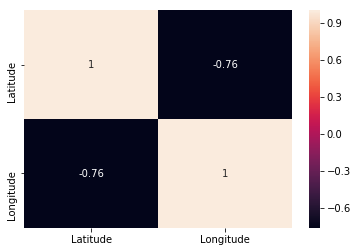


Seaborn Pairplot:


<Figure size 864x864 with 0 Axes>

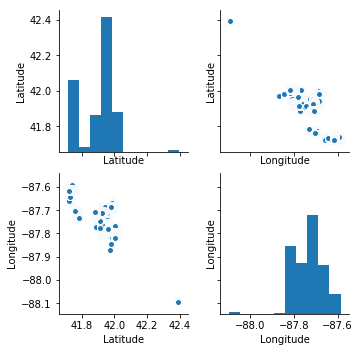








Name:   test

Shape:  (116293, 11)

Data types:
Id                          int64
Date                       object
Address                    object
Species                    object
Block                       int64
Street                     object
Trap                       object
AddressNumberAndStreet     object
Latitude                  float64
Longitude                 float64
AddressAccuracy             int64
dtype: object

Describe:
                  Id          Block       Latitude      Longitude  \
count  116293.000000  116293.000000  116293.000000  116293.000000   
mean    58147.000000      41.131100      41.849389     -87.693658   
std     33571.041765      24.864726       0.106593       0.080699   
min         1.000000      10.000000      41.644612     -87.930995   
25%     29074.000000      18.000000      41.753411     -87.750938   
50%     58147.000000      39.000000      41.862292     -87.694991   
75%     87220.000000      61.000000      41.951866     -87.6488

{'Id': [], 'Block': [], 'Latitude': [], 'Longitude': [], 'AddressAccuracy': []}


Seaborn Correlation Heatmap:


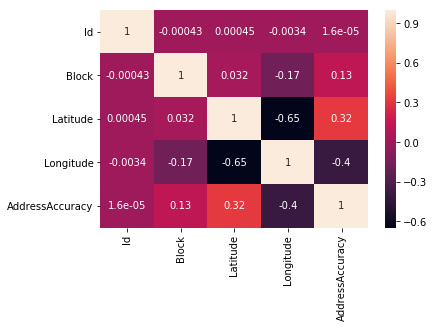


Seaborn Pairplot:


<Figure size 2376x2376 with 0 Axes>

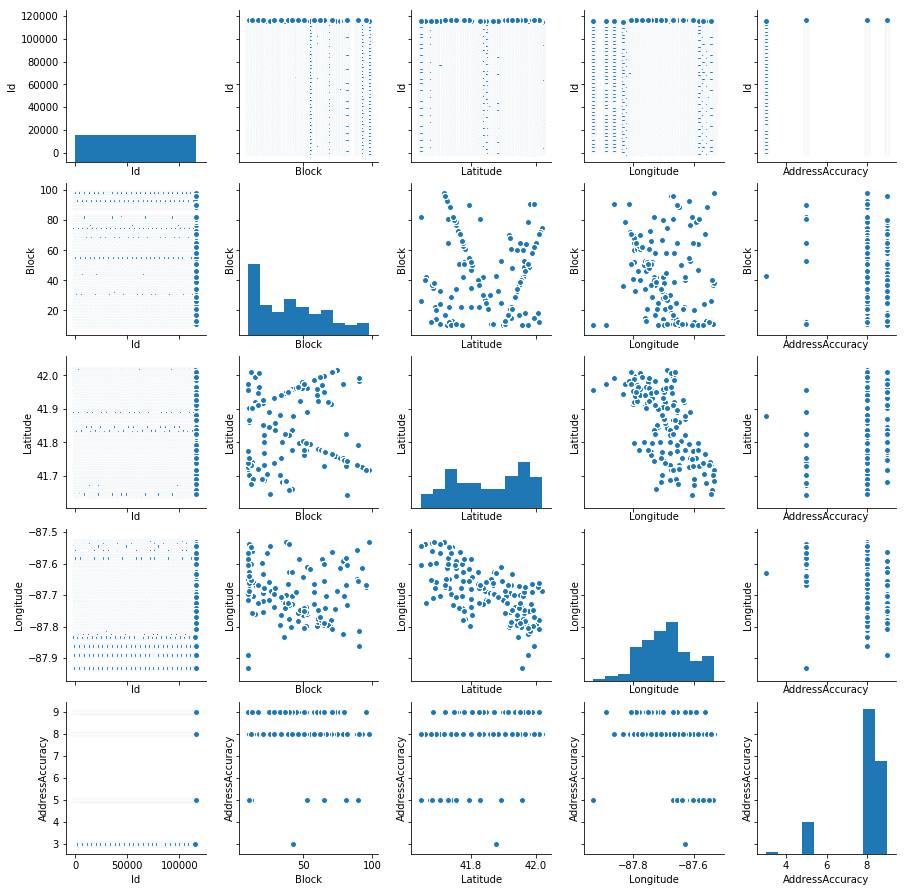








Name:   train

Shape:  (10506, 12)

Data types:
Date                       object
Address                    object
Species                    object
Block                       int64
Street                     object
Trap                       object
AddressNumberAndStreet     object
Latitude                  float64
Longitude                 float64
AddressAccuracy             int64
NumMosquitos                int64
WnvPresent                  int64
dtype: object

Describe:
              Block      Latitude     Longitude  AddressAccuracy  \
count  10506.000000  10506.000000  10506.000000     10506.000000   
mean      35.687797     41.841139    -87.699908         7.819532   
std       24.339468      0.112742      0.096514         1.452921   
min       10.000000     41.644612    -87.930995         3.000000   
25%       12.000000     41.732984    -87.760070         8.000000   
50%       33.000000     41.846283    -87.694991         8.000000   
75%       52.000000     41.954690   

{'Block': [],
 'Latitude': [],
 'Longitude': [],
 'AddressAccuracy': [],
 'NumMosquitos': [],
 'WnvPresent': []}


Seaborn Correlation Heatmap:


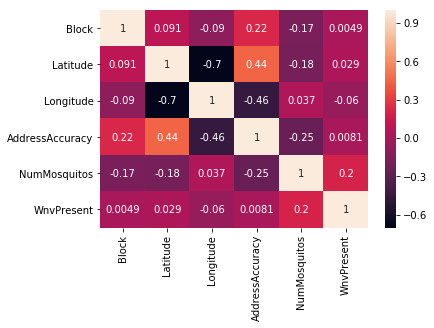


Seaborn Pairplot:


<Figure size 2592x2592 with 0 Axes>

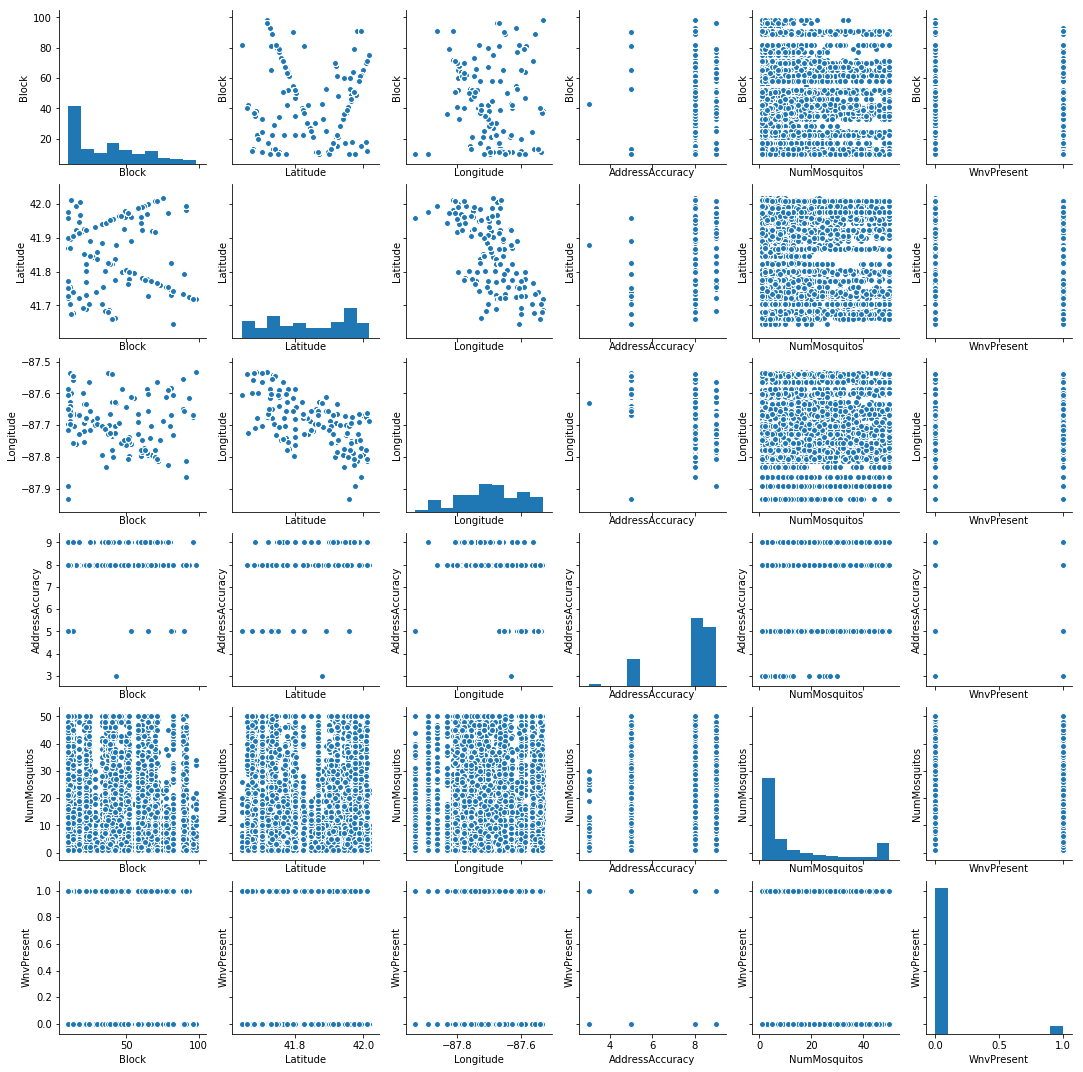








Name:   weather

Shape:  (2944, 22)

Data types:
Station          int64
Date            object
Tmax             int64
Tmin             int64
Tavg            object
Depart          object
DewPoint         int64
WetBulb         object
Heat            object
Cool            object
Sunrise         object
Sunset          object
CodeSum         object
Depth           object
Water1          object
SnowFall        object
PrecipTotal     object
StnPressure     object
SeaLevel        object
ResultSpeed    float64
ResultDir        int64
AvgSpeed        object
dtype: object

Describe:
           Station         Tmax         Tmin     DewPoint  ResultSpeed  \
count  2944.000000  2944.000000  2944.000000  2944.000000  2944.000000   
mean      1.500000    76.166101    57.810462    53.457880     6.960666   
std       0.500085    11.461970    10.381939    10.675181     3.587527   
min       1.000000    41.000000    29.000000    22.000000     0.100000   
25%       1.000000    69.000000    50.00000

{'Station': [],
 'Tmax': ['Tmin', 'DewPoint'],
 'Tmin': ['Tmax', 'DewPoint'],
 'DewPoint': ['Tmax', 'Tmin'],
 'ResultSpeed': [],
 'ResultDir': []}


Seaborn Correlation Heatmap:


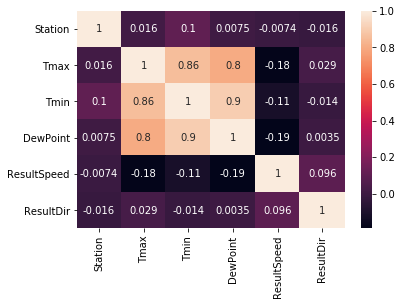


Seaborn Pairplot:


<Figure size 4752x4752 with 0 Axes>

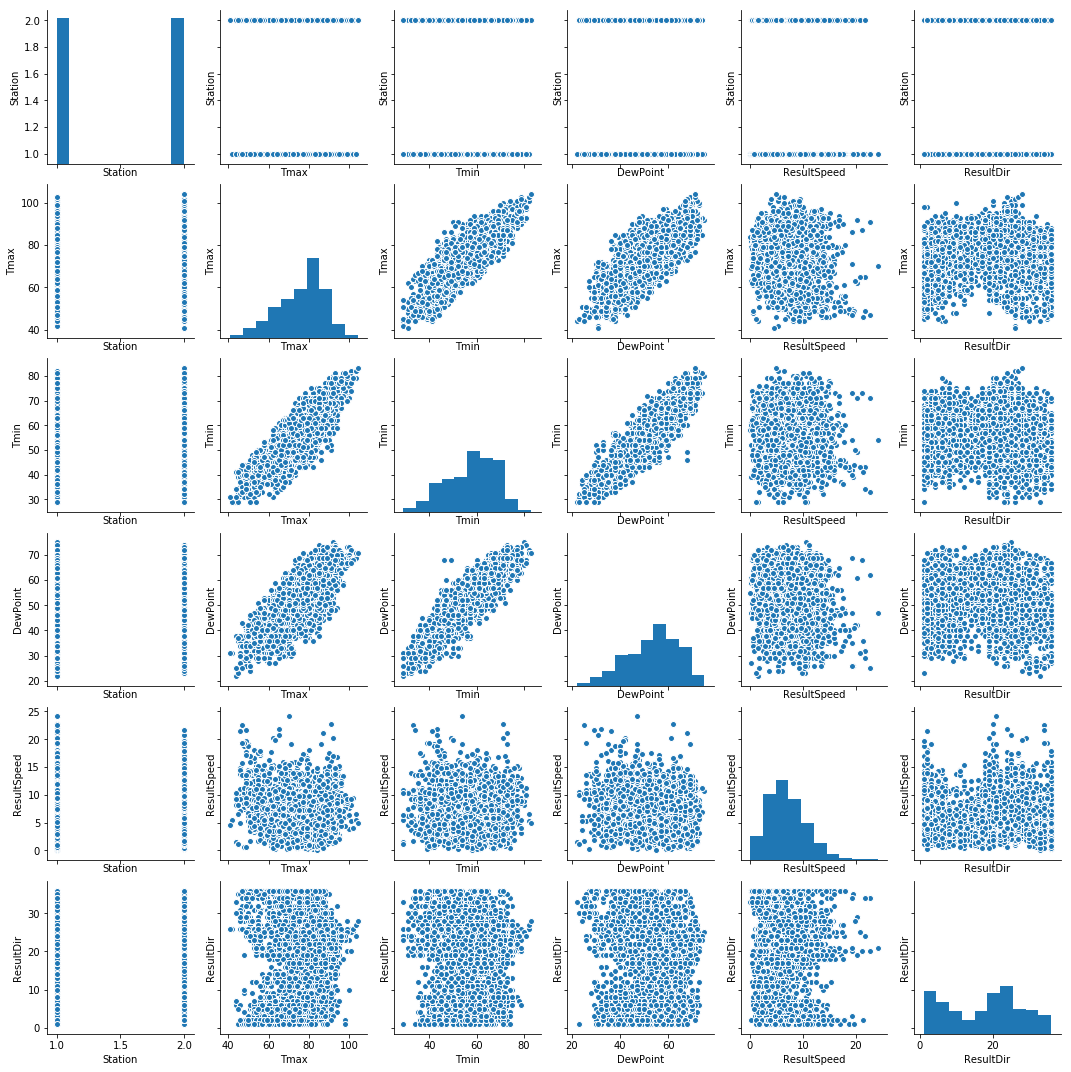

In [119]:
initial_forray(data_dict, True)

1. Describe the data. What does it represent? What types are present? What does each data points' distribution look like? Discuss these questions, and your own, with your partners. Document your conclusions.
2. What kind of cleaning is needed? Document any potential issues that will need to be resolved

Data Cleaning:
- spray
    - There are only a few (~580) nulls in the spray csv. They're all time related, and out of ~14.8k it doesn't exactly dent the records if we delete them. We could also just put in the same time as some other time for the closest date that is appropriate, if necessary. 
    - Can we concat the date and time into a datetime object and make that the index?
    - it looks like there is an outlier of sorts here, but it's not out of the realm of possibility
    - The time nulls are all on 2011-09-07

There don't seem to be any obvious errors regarding outliers or obviously faulty data (minus the timecodes missing on some of the spraying).

There are no other nulls in any of the csv's.



In [5]:
temp = pd.read_csv('../assets/spray.csv')

In [6]:
temp2 = temp[temp['Time'].isnull()]

In [7]:
temp2['Date'].unique() 
#type(temp2.iloc[0,0])


array(['2011-09-07'], dtype=object)

In [8]:
temp['datetime'] = temp['Date'] + ' ' + temp['Time']

In [9]:
temp['datetime'] = pd.to_datetime(temp['datetime'])

In [10]:
type(temp.iloc[4,4])

pandas._libs.tslibs.timestamps.Timestamp

In [11]:
temp.index=temp['datetime'] #need to fill in the 2011-09-07 nulls to make this work correctly

In [20]:
temp['2011-09']

,Date,Time,Latitude,Longitude,datetime
datetime,,,,,
2011-09-07 19:52:52,2011-09-07,7:52:52 PM,41.981433,-87.787777,2011-09-07 19:52:52
2011-09-07 19:53:02,2011-09-07,7:53:02 PM,41.980998,-87.787778,2011-09-07 19:53:02
2011-09-07 19:53:12,2011-09-07,7:53:12 PM,41.980560,-87.787762,2011-09-07 19:53:12
2011-09-07 19:53:22,2011-09-07,7:53:22 PM,41.980198,-87.787758,2011-09-07 19:53:22
2011-09-07 19:53:32,2011-09-07,7:53:32 PM,41.979752,-87.787765,2011-09-07 19:53:32
2011-09-07 19:53:42,2011-09-07,7:53:42 PM,41.979352,-87.787753,2011-09-07 19:53:42
2011-09-07 19:53:52,2011-09-07,7:53:52 PM,41.978850,-87.787763,2011-09-07 19:53:52
2011-09-07 19:54:02,2011-09-07,7:54:02 PM,41.978398,-87.787773,2011-09-07 19:54:02
2011-09-07 19:54:12,2011-09-07,7:54:12 PM,41.977990,-87.787760,2011-09-07 19:54:12


In [13]:
temp3 = temp[temp['Date']=='2011-09-07']
temp3.columns

Index(['Date', 'Time', 'Latitude', 'Longitude', 'datetime'], dtype='object')

In [14]:
temp3.sort_values(['Longitude', 'Latitude'], axis=0)#.tail(480)
# based on this, the missing time values are interspersed throughout the data
# when sorted by lat,long many more of the missing times are near the end of the data.
# when sorted by long,lat they seem to be more interspersed 
# neither sorting look like they're absolutely correct based on the datetimes of the ones that are not null not being in correct order 

,Date,Time,Latitude,Longitude,datetime
datetime,,,,,
2011-09-07 19:58:50,2011-09-07,7:58:50 PM,41.975748,-87.836560,2011-09-07 19:58:50
2011-09-07 20:04:00,2011-09-07,8:04:00 PM,41.977203,-87.836560,2011-09-07 20:04:00
2011-09-07 19:59:00,2011-09-07,7:59:00 PM,41.976298,-87.836545,2011-09-07 19:59:00
2011-09-07 20:04:20,2011-09-07,8:04:20 PM,41.977783,-87.836542,2011-09-07 20:04:20
2011-09-07 20:13:20,2011-09-07,8:13:20 PM,41.980373,-87.836337,2011-09-07 20:13:20
2011-09-07 20:13:10,2011-09-07,8:13:10 PM,41.980810,-87.836327,2011-09-07 20:13:10
2011-09-07 20:13:30,2011-09-07,8:13:30 PM,41.979928,-87.836272,2011-09-07 20:13:30
2011-09-07 19:58:40,2011-09-07,7:58:40 PM,41.975643,-87.836230,2011-09-07 19:58:40
2011-09-07 20:04:30,2011-09-07,8:04:30 PM,41.977955,-87.836193,2011-09-07 20:04:30


How do the spray times/dates measure up against the sightings? weather?

In [28]:
weather_temp = weather.copy()
weather_temp

,Station,Date,Tmax,Tmin,Tavg,Depart,DewPoint,WetBulb,Heat,Cool,...,CodeSum,Depth,Water1,SnowFall,PrecipTotal,StnPressure,SeaLevel,ResultSpeed,ResultDir,AvgSpeed
0,1,2007-05-01,83,50,67,14,51,56,0,2,...,,0,M,0.0,0.00,29.10,29.82,1.7,27,9.2
1,2,2007-05-01,84,52,68,M,51,57,0,3,...,,M,M,M,0.00,29.18,29.82,2.7,25,9.6
2,1,2007-05-02,59,42,51,-3,42,47,14,0,...,BR,0,M,0.0,0.00,29.38,30.09,13.0,4,13.4
3,2,2007-05-02,60,43,52,M,42,47,13,0,...,BR HZ,M,M,M,0.00,29.44,30.08,13.3,2,13.4
4,1,2007-05-03,66,46,56,2,40,48,9,0,...,,0,M,0.0,0.00,29.39,30.12,11.7,7,11.9
5,2,2007-05-03,67,48,58,M,40,50,7,0,...,HZ,M,M,M,0.00,29.46,30.12,12.9,6,13.2
6,1,2007-05-04,66,49,58,4,41,50,7,0,...,RA,0,M,0.0,T,29.31,30.05,10.4,8,10.8
7,2,2007-05-04,78,51,M,M,42,50,M,M,...,,M,M,M,0.00,29.36,30.04,10.1,7,10.4
8,1,2007-05-05,66,53,60,5,38,49,5,0,...,,0,M,0.0,T,29.40,30.10,11.7,7,12.0
9,2,2007-05-05,66,54,60,M,39,50,5,0,...,,M,M,M,T,29.46,30.09,11.2,7,11.5


In [38]:

weather_temp['PrecipTotal'][6]

'  T'

In [39]:
weather_temp['PrecipTotal'].replace(to_replace='  T', value=0.05)


0       0.00
1       0.00
2       0.00
3       0.00
4       0.00
5       0.00
6       0.05
7       0.00
8       0.05
9       0.05
10      0.00
11      0.00
12      0.05
13      0.00
14      0.00
15      0.05
16      0.13
17      0.02
18      0.00
19      0.00
20      0.00
21      0.00
22      0.00
23      0.00
24      0.00
25      0.00
26      0.00
27      0.00
28      0.38
29      0.60
        ... 
2914    0.05
2915    0.01
2916    0.01
2917    0.02
2918    0.00
2919    0.00
2920    0.01
2921    0.00
2922    0.00
2923    0.00
2924    0.00
2925    0.00
2926    0.00
2927    0.05
2928    0.00
2929    0.00
2930    0.00
2931    0.00
2932    0.00
2933    0.00
2934    0.00
2935    0.02
2936    0.05
2937    0.03
2938    0.00
2939    0.00
2940    0.00
2941    0.05
2942    0.03
2943    0.04
Name: PrecipTotal, Length: 2944, dtype: object

In [40]:
weather_temp.replace('  T', 0.005)

,Station,Date,Tmax,Tmin,Tavg,Depart,DewPoint,WetBulb,Heat,Cool,...,CodeSum,Depth,Water1,SnowFall,PrecipTotal,StnPressure,SeaLevel,ResultSpeed,ResultDir,AvgSpeed
0,1,2007-05-01,83,50,67,14,51,56,0,2,...,,0,M,0.0,0.00,29.10,29.82,1.7,27,9.2
1,2,2007-05-01,84,52,68,M,51,57,0,3,...,,M,M,M,0.00,29.18,29.82,2.7,25,9.6
2,1,2007-05-02,59,42,51,-3,42,47,14,0,...,BR,0,M,0.0,0.00,29.38,30.09,13.0,4,13.4
3,2,2007-05-02,60,43,52,M,42,47,13,0,...,BR HZ,M,M,M,0.00,29.44,30.08,13.3,2,13.4
4,1,2007-05-03,66,46,56,2,40,48,9,0,...,,0,M,0.0,0.00,29.39,30.12,11.7,7,11.9
5,2,2007-05-03,67,48,58,M,40,50,7,0,...,HZ,M,M,M,0.00,29.46,30.12,12.9,6,13.2
6,1,2007-05-04,66,49,58,4,41,50,7,0,...,RA,0,M,0.0,0.005,29.31,30.05,10.4,8,10.8
7,2,2007-05-04,78,51,M,M,42,50,M,M,...,,M,M,M,0.00,29.36,30.04,10.1,7,10.4
8,1,2007-05-05,66,53,60,5,38,49,5,0,...,,0,M,0.0,0.005,29.40,30.10,11.7,7,12.0
9,2,2007-05-05,66,54,60,M,39,50,5,0,...,,M,M,M,0.005,29.46,30.09,11.2,7,11.5


change values in weather to reflect nulls, figure out how many nulls there are, see what(if anything) can be replaced in there

In [35]:
weather.replace('M', np.nan, inplace=True)
#weather.replace('T', np.nan)
weather.head(15)

,Station,Date,Tmax,Tmin,Tavg,Depart,DewPoint,WetBulb,Heat,Cool,...,CodeSum,Depth,Water1,SnowFall,PrecipTotal,StnPressure,SeaLevel,ResultSpeed,ResultDir,AvgSpeed
0,1,2007-05-01,83,50,67,14,51,56,0,2,...,,0,NaN,0.0,0.00,29.10,29.82,1.7,27,9.2
1,2,2007-05-01,84,52,68,NaN,51,57,0,3,...,,NaN,NaN,NaN,0.00,29.18,29.82,2.7,25,9.6
2,1,2007-05-02,59,42,51,-3,42,47,14,0,...,BR,0,NaN,0.0,0.00,29.38,30.09,13.0,4,13.4
3,2,2007-05-02,60,43,52,NaN,42,47,13,0,...,BR HZ,NaN,NaN,NaN,0.00,29.44,30.08,13.3,2,13.4
4,1,2007-05-03,66,46,56,2,40,48,9,0,...,,0,NaN,0.0,0.00,29.39,30.12,11.7,7,11.9
5,2,2007-05-03,67,48,58,NaN,40,50,7,0,...,HZ,NaN,NaN,NaN,0.00,29.46,30.12,12.9,6,13.2
6,1,2007-05-04,66,49,58,4,41,50,7,0,...,RA,0,NaN,0.0,T,29.31,30.05,10.4,8,10.8
7,2,2007-05-04,78,51,NaN,NaN,42,50,NaN,NaN,...,,NaN,NaN,NaN,0.00,29.36,30.04,10.1,7,10.4
8,1,2007-05-05,66,53,60,5,38,49,5,0,...,,0,NaN,0.0,T,29.40,30.10,11.7,7,12.0
9,2,2007-05-05,66,54,60,NaN,39,50,5,0,...,,NaN,NaN,NaN,T,29.46,30.09,11.2,7,11.5


In [36]:
weather.dtypes

Station          int64
Date            object
Tmax             int64
Tmin             int64
Tavg            object
Depart          object
DewPoint         int64
WetBulb         object
Heat            object
Cool            object
Sunrise         object
Sunset          object
CodeSum         object
Depth           object
Water1         float64
SnowFall        object
PrecipTotal     object
StnPressure     object
SeaLevel        object
ResultSpeed    float64
ResultDir        int64
AvgSpeed        object
dtype: object